In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sraban Ghosh\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [3]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

In [4]:
#kaggle facial expression recognition challenge dataset (fer2013.csv)

with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))


number of instances:  35888
instance length:  2304


In [7]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")

        val = img.split(" ")

        pixels = np.array(val, 'float32')

        emotion = keras.utils.to_categorical(emotion, num_classes)

        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")


In [8]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [9]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [10]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)


In [11]:

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)



In [17]:
fit = False

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('facial_expression_model_weights.h5') #load weights


In [21]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()
    

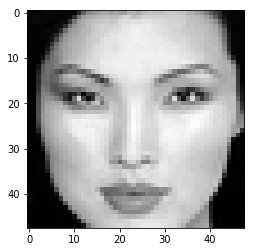

[3.2894404e-05 3.0041891e-09 6.6471375e-03 5.6535537e-05 3.5452263e-03
 4.5738572e-05 9.8967242e-01]


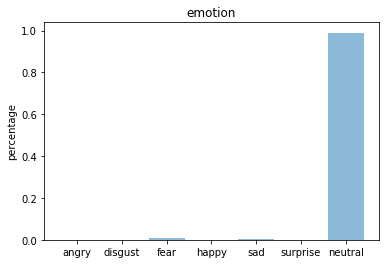

----------------------------------------------


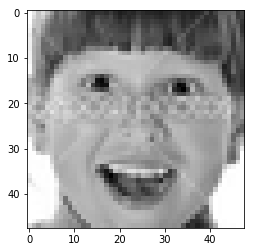

[3.9869175e-09 2.7090162e-17 5.6877055e-11 9.9989390e-01 8.2783613e-10
 1.2336547e-05 9.3861214e-05]


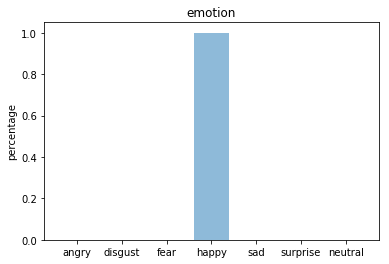

----------------------------------------------


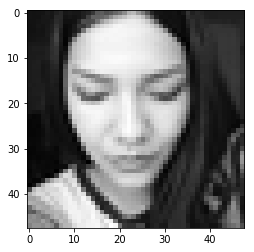

[7.8376778e-04 4.0785181e-08 2.2041904e-02 1.5807429e-06 9.5114022e-01
 9.8389637e-07 2.6031446e-02]


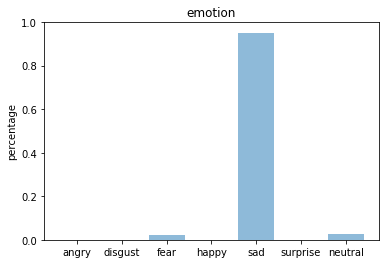

----------------------------------------------


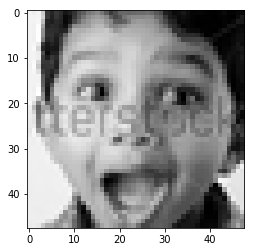

[1.14870008e-05 1.08672744e-07 4.27200705e-01 3.95308346e-01
 9.79044053e-05 1.77290186e-01 9.12294418e-05]


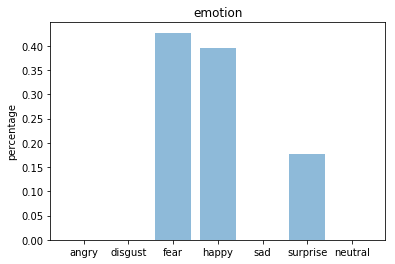

----------------------------------------------


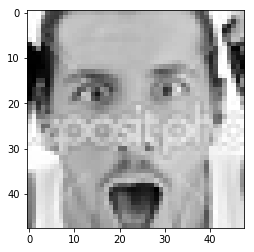

[3.6857764e-07 2.1119044e-12 1.1177733e-02 1.4096228e-04 2.5075360e-13
 9.8868096e-01 9.7991357e-16]


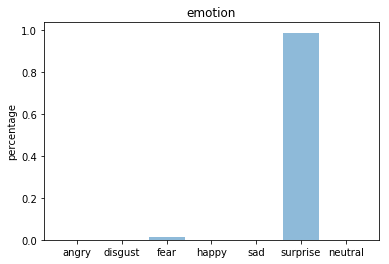

----------------------------------------------


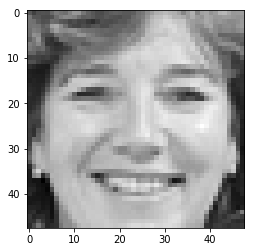

[8.1575795e-09 1.3959553e-11 5.7646084e-06 9.7785550e-01 2.8099926e-06
 3.3846734e-07 2.2135528e-02]


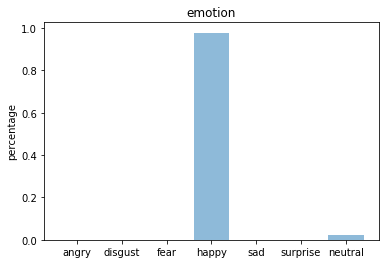

----------------------------------------------


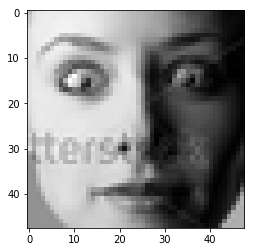

[3.4171471e-03 8.0523456e-11 2.5970962e-02 1.5036523e-02 8.1630853e-05
 1.0220575e-03 9.5447165e-01]


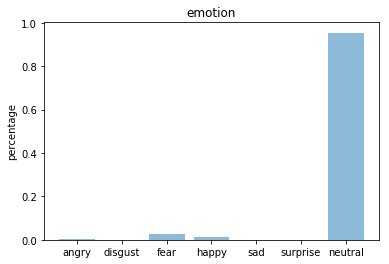

----------------------------------------------


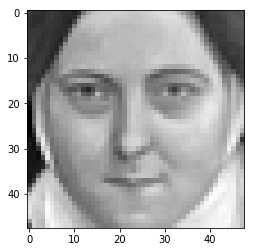

[0.06555    0.0008712  0.6720406  0.01433106 0.10036121 0.00103579
 0.14581016]


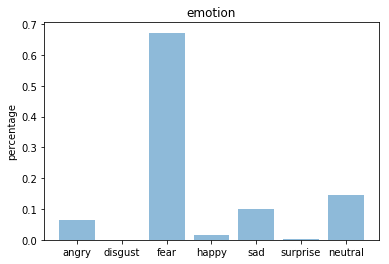

----------------------------------------------


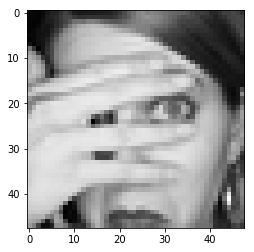

[6.8956301e-02 2.3144064e-07 4.7567233e-01 2.7300730e-06 2.7541333e-01
 5.9915806e-06 1.7994910e-01]


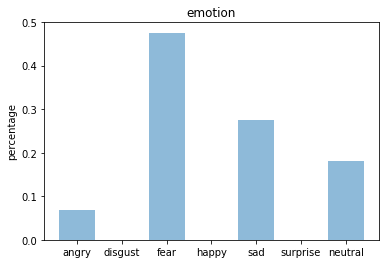

----------------------------------------------


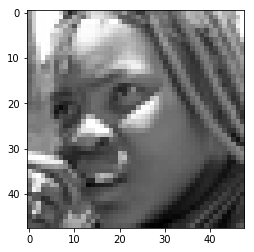

[1.0874260e-02 5.1705465e-05 5.6007747e-03 9.4631100e-01 3.2790564e-02
 1.2400208e-06 4.3704798e-03]


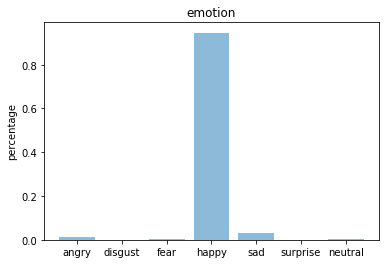

----------------------------------------------


In [46]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 70 and index >= 60:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores

			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);

			plt.gray()
			plt.imshow(testing_img)
			plt.show()

			print(i)

			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1



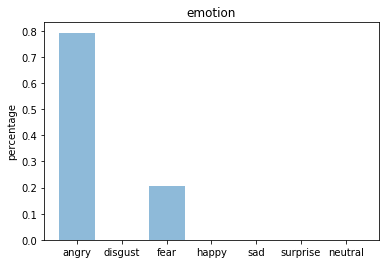

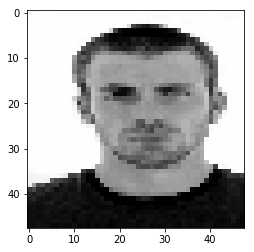

In [45]:
#make prediction for custom image out of test set

img = image.load_img("test_images/chris.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

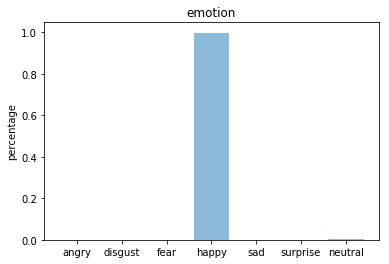

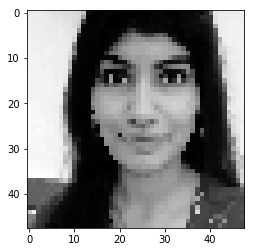

In [37]:
#make prediction for custom image out of test set

img = image.load_img("test_images/me.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

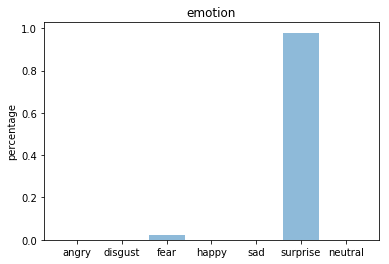

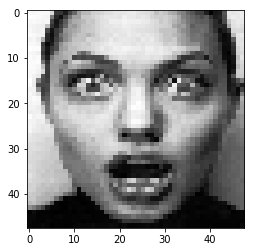

In [41]:
#make prediction for custom image out of test set

img = image.load_img("test_images/jolie.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

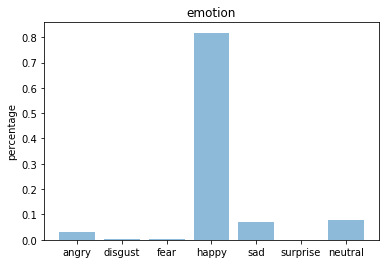

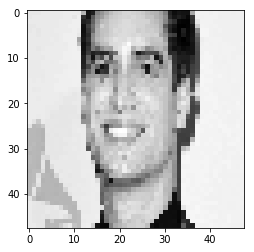

In [32]:
#make prediction for custom image out of test set

img = image.load_img("test_images/brendon.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

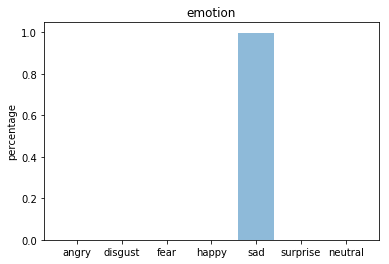

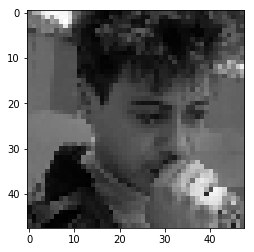

In [43]:
#make prediction for custom image out of test set

img = image.load_img("test_images/rdj.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

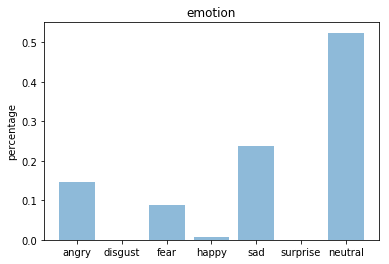

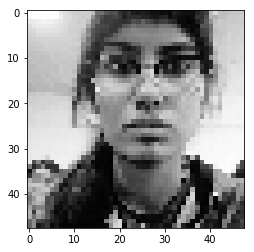

In [38]:
#make prediction for custom image out of test set

img = image.load_img("test_images/snapchat.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

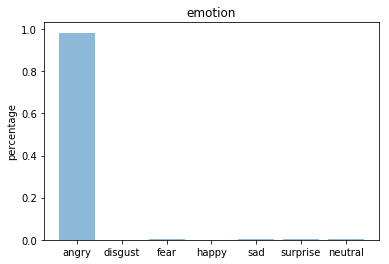

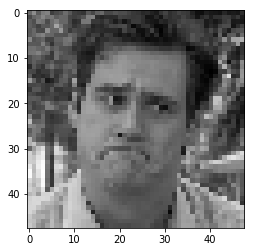

In [39]:
#make prediction for custom image out of test set

img = image.load_img("test_images/jim.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

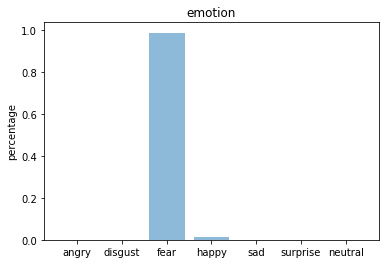

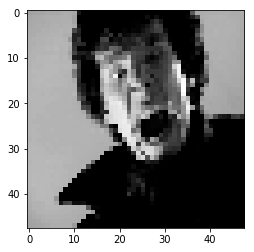

In [36]:
#make prediction for custom image out of test set

img = image.load_img("test_images/sherlock.png", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()